<a href="https://colab.research.google.com/github/Venki51/devtern/blob/main/Uber_Trips_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the necessary Python libraries and the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("uber-raw-data-jul14.csv")

In [3]:
data

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
...,...,...,...,...
294605,7/2/2014 20:05:00,40.7507,-73.9801,B02617
294606,7/2/2014 20:05:00,40.7583,-73.9686,B02617
294607,7/2/2014 20:05:00,40.7412,-73.9848,B02617
294608,7/2/2014 20:06:00,40.7193,-73.8758,B02617


In [4]:
data["Date/Time"]=data["Date/Time"].map(pd.to_datetime)
data

,Date/Time,Lat,Lon,Base
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512
...,...,...,...,...
294605,2014-07-02 20:05:00,40.7507,-73.9801,B02617
294606,2014-07-02 20:05:00,40.7583,-73.9686,B02617
294607,2014-07-02 20:05:00,40.7412,-73.9848,B02617
294608,2014-07-02 20:06:00,40.7193,-73.8758,B02617


# prepare the data according to days and hours

In [5]:
data["day"]=data["Date/Time"].apply(lambda x: x.day)
data["weekdays"]=data["Date/Time"].apply(lambda x: x.weekday())
data["hour"]=data["Date/Time"].apply(lambda x: x.hour)

In [6]:
data

,Date/Time,Lat,Lon,Base,day,weekdays,hour
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,1,1,0
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,1,1,0
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,1,1,0
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,1,1,0
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,1,1,0
...,...,...,...,...,...,...,...
294605,2014-07-02 20:05:00,40.7507,-73.9801,B02617,2,2,20
294606,2014-07-02 20:05:00,40.7583,-73.9686,B02617,2,2,20
294607,2014-07-02 20:05:00,40.7412,-73.9848,B02617,2,2,20
294608,2014-07-02 20:06:00,40.7193,-73.8758,B02617,2,2,20


# look at each day to see on which day the Uber trips were highest

<ipython-input-12-d29b96ca0324>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["day"])


<Axes: xlabel='day', ylabel='Density'>

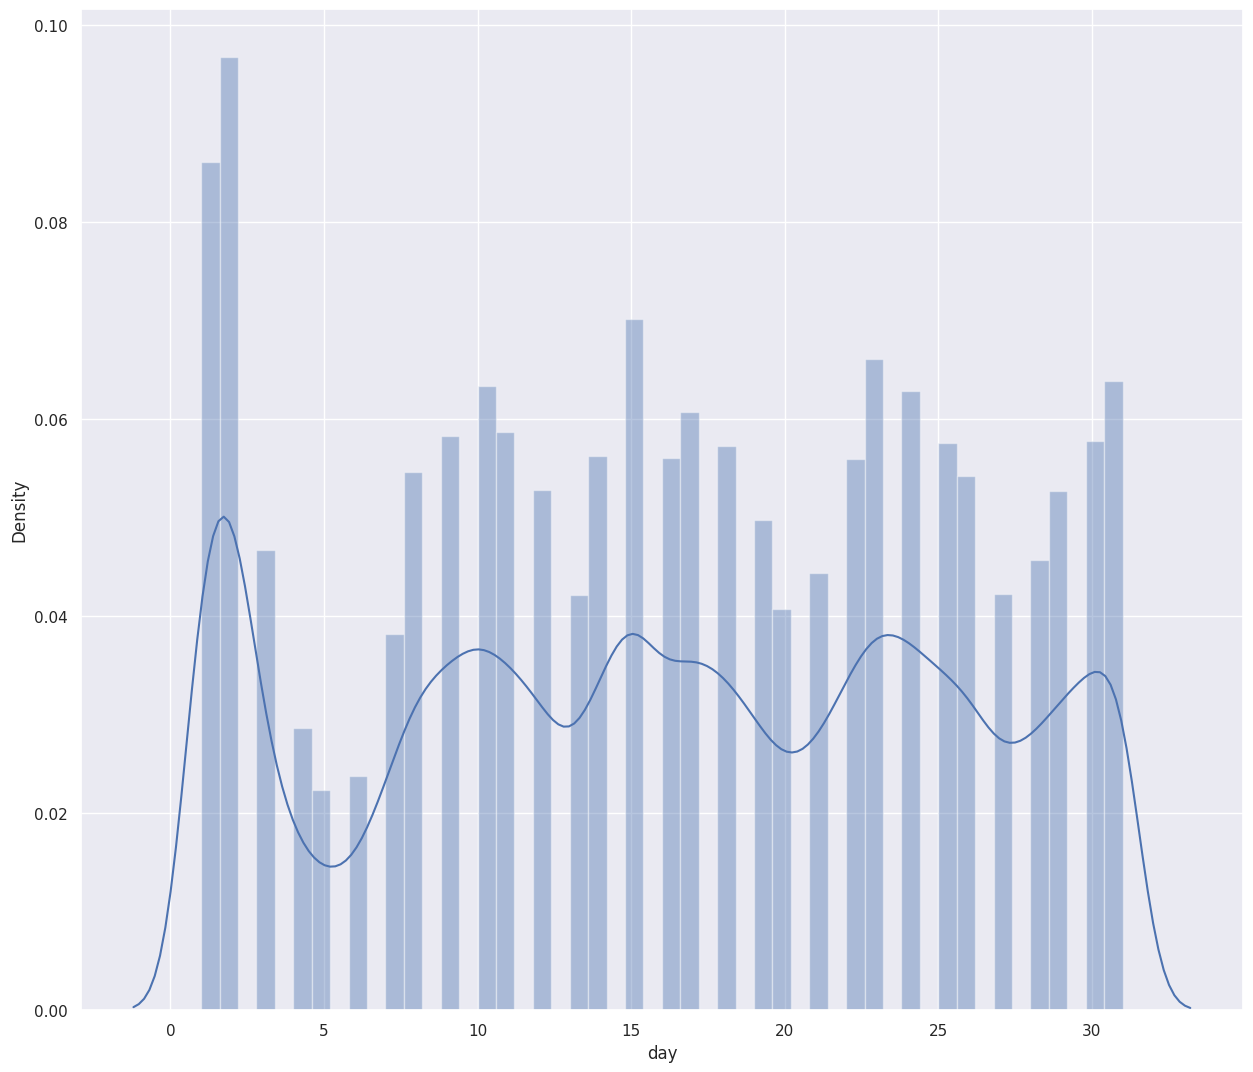

In [12]:
sns.set(rc={'figure.figsize':(15,13)})
sns.distplot(data["day"])


# analyse the Uber trips according to the hours

<ipython-input-8-87e9f10615aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["hour"])


<Axes: xlabel='hour', ylabel='Density'>

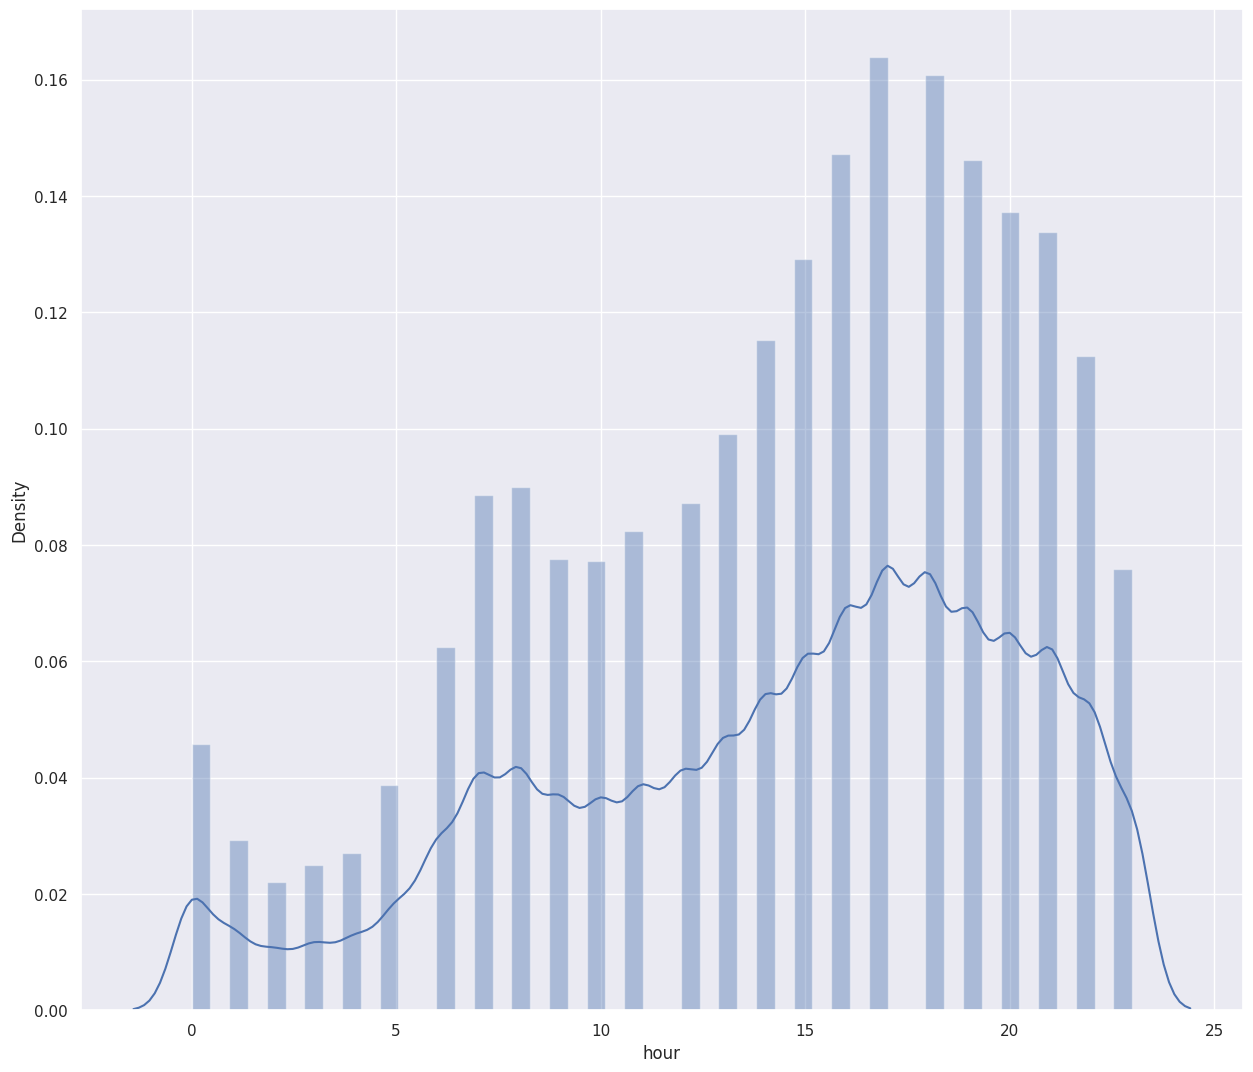

In [8]:
sns.distplot(data["hour"])

# analyse the Uber trips according to the weekdays

<ipython-input-9-25638e14af01>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["weekdays"])


<Axes: xlabel='weekdays', ylabel='Density'>

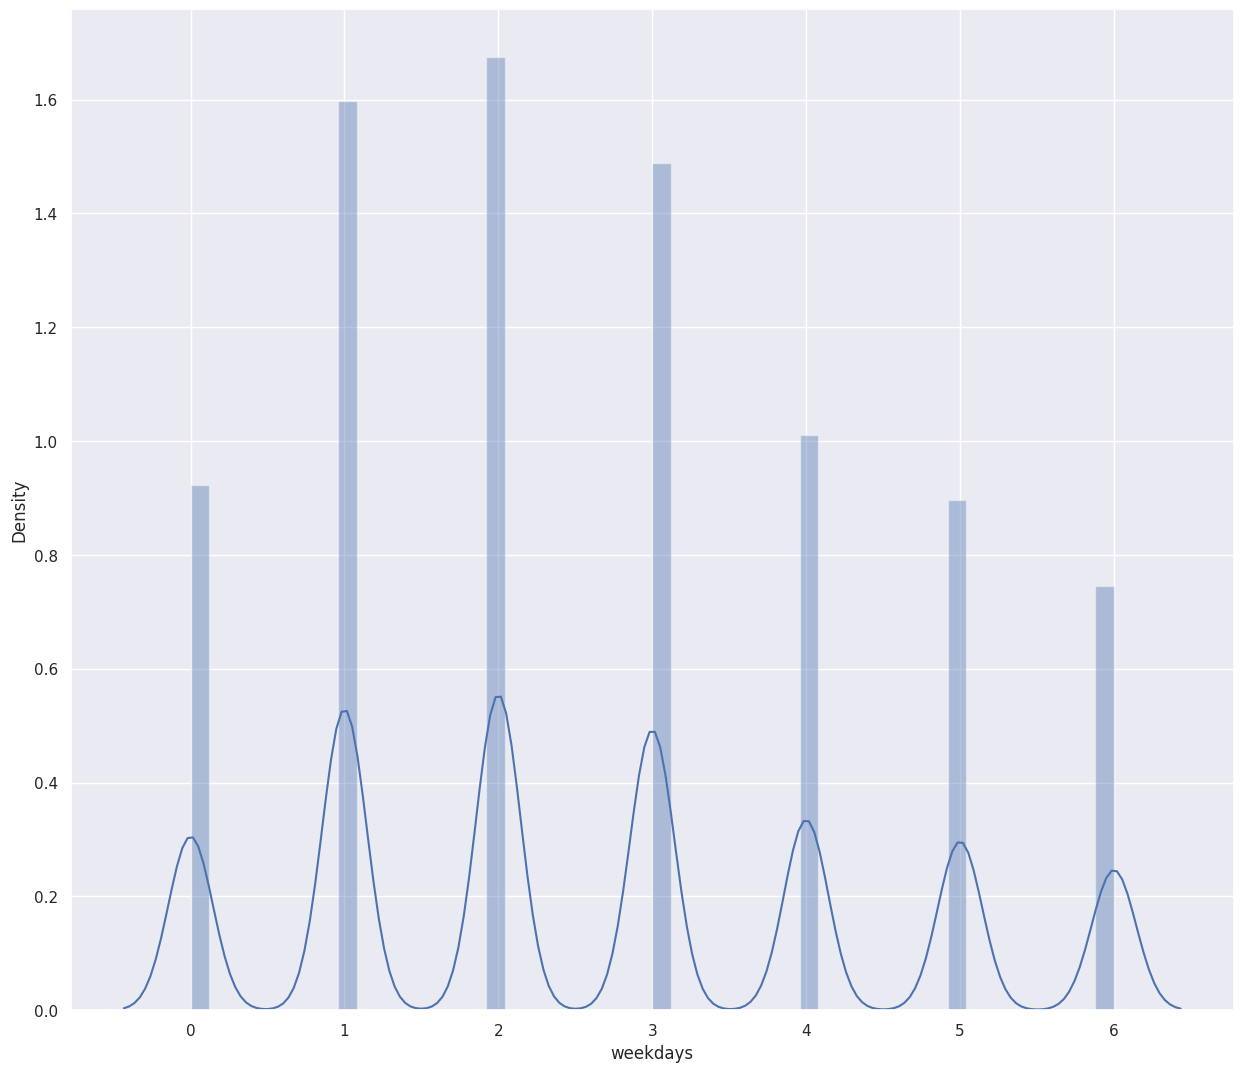

In [9]:
sns.distplot(data["weekdays"])

# look at the correlation of hours and weekdays

<Axes: xlabel='hour', ylabel='weekdays'>

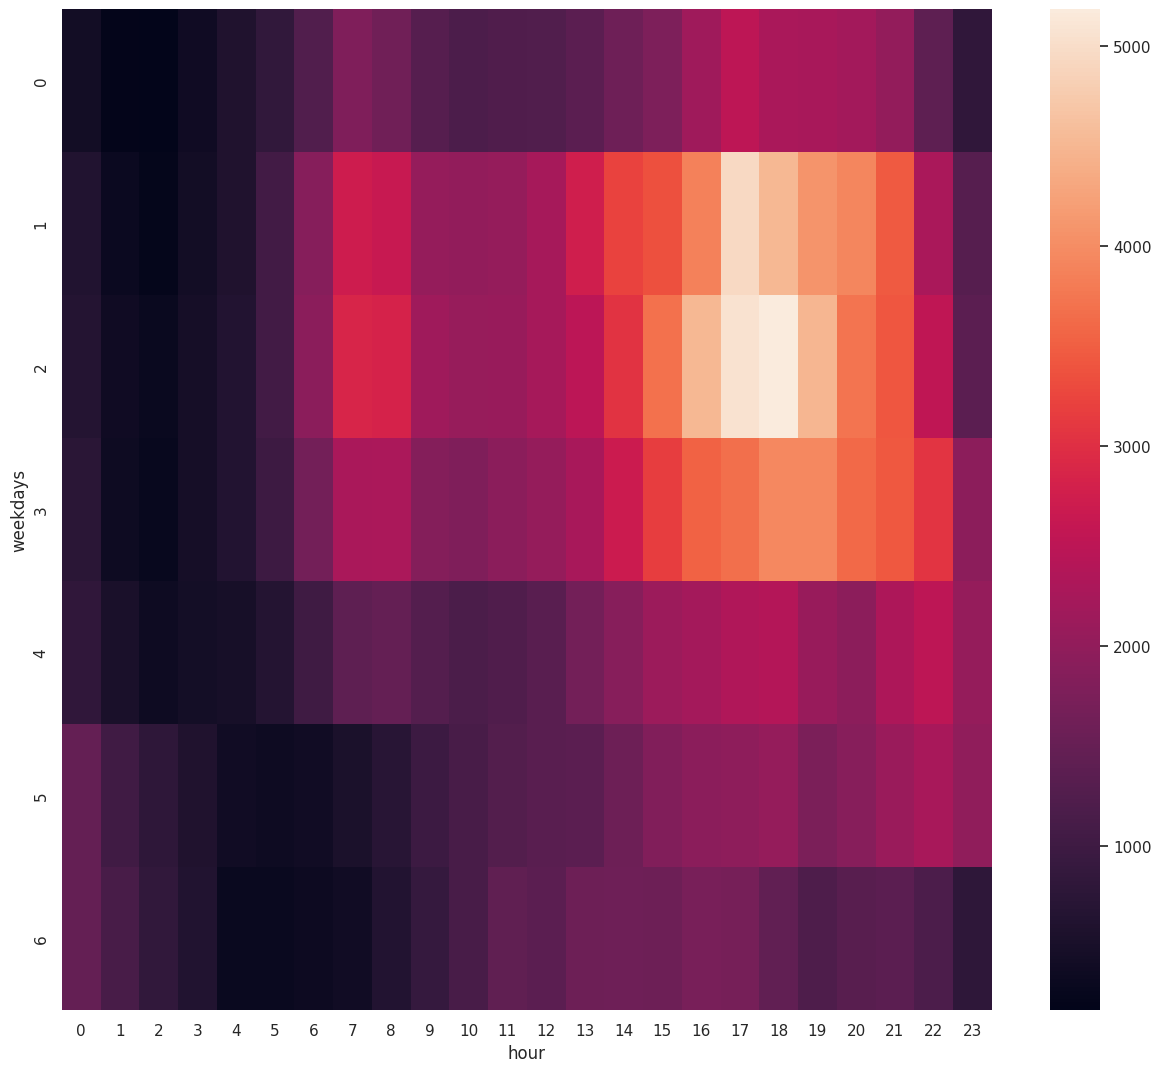

In [10]:
df=data.groupby(["weekdays","hour"]).apply(lambda x: len(x))
df=df.unstack()
sns.heatmap(df,annot=False)

# plot the density of Uber trips according to the regions of the New Your city

<Axes: xlabel='Lon', ylabel='Lat'>

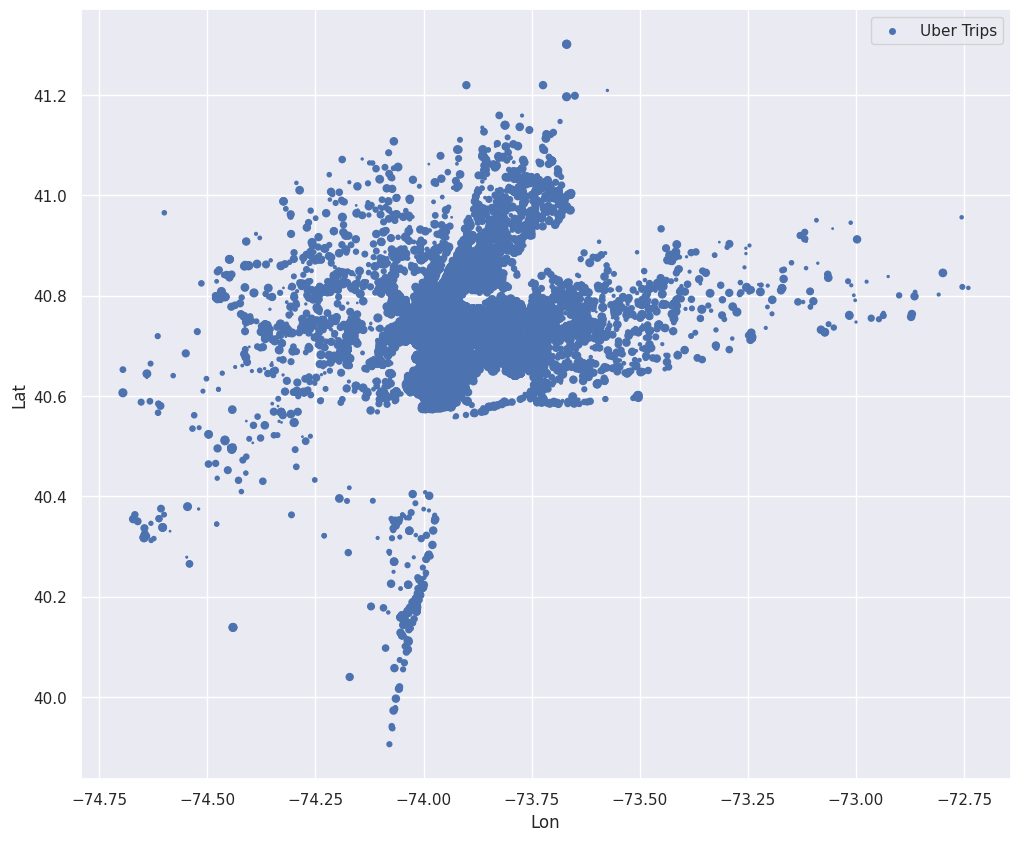

In [11]:
data.plot(kind='scatter',x='Lon', y='Lat', s=data['day'], label='Uber Trips', figsize=(12, 10))